<a href="https://colab.research.google.com/github/BigSekas/WB_mirea/blob/main/Workbook7_Mironov_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание**


Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
Данные нейросети:


− три входа (𝑥1, 𝑥2, 𝑥3
);


− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);


− выход (𝑜1).


Нейроны имеют идентичные веса и пороги:


− 𝑤 = [0.5, 0.5, 0.5]


− 𝑏 = 0


Данные нейросети:


− два входа (𝑥1, 𝑥2);


− два нейрона в скрытых слоях (ℎ1, ℎ2);


− два выхода (𝑜1, 𝑜2
).


Нейроны имеют идентичные веса и пороги:


− 𝑤 = [1, 0];


− 𝑏 = 1.


In [ ]:
class OurNeuralNetwork1:
    def __init__(self):

        self.weights = [0.5, 0.5, 0.5]
        self.bias = 0

    def feedforward(self, inputs):

        total = sum([i * w for i, w in zip(inputs, self.weights)]) + self.bias

        return total

class OurNeuralNetwork2:
    def __init__(self):
        self.weights = [1, 0]
        self.bias = 1

    def feedforward(self, inputs):
        total = sum([i * w for i, w in zip(inputs, self.weights)]) + self.bias
        return total

network1 = OurNeuralNetwork1()
network2 = OurNeuralNetwork2()

inputs1 = [0.1, 0.2, 0.3]
output1 = network1.feedforward(inputs1)
print("Output of Network 1:", output1)

inputs2 = [0.4, 0.5]
output2 = network2.feedforward(inputs2)
print("Output of Network 2:", output2)


Output of Network 1: 0.30000000000000004
Output of Network 2: 1.4


**Задание**


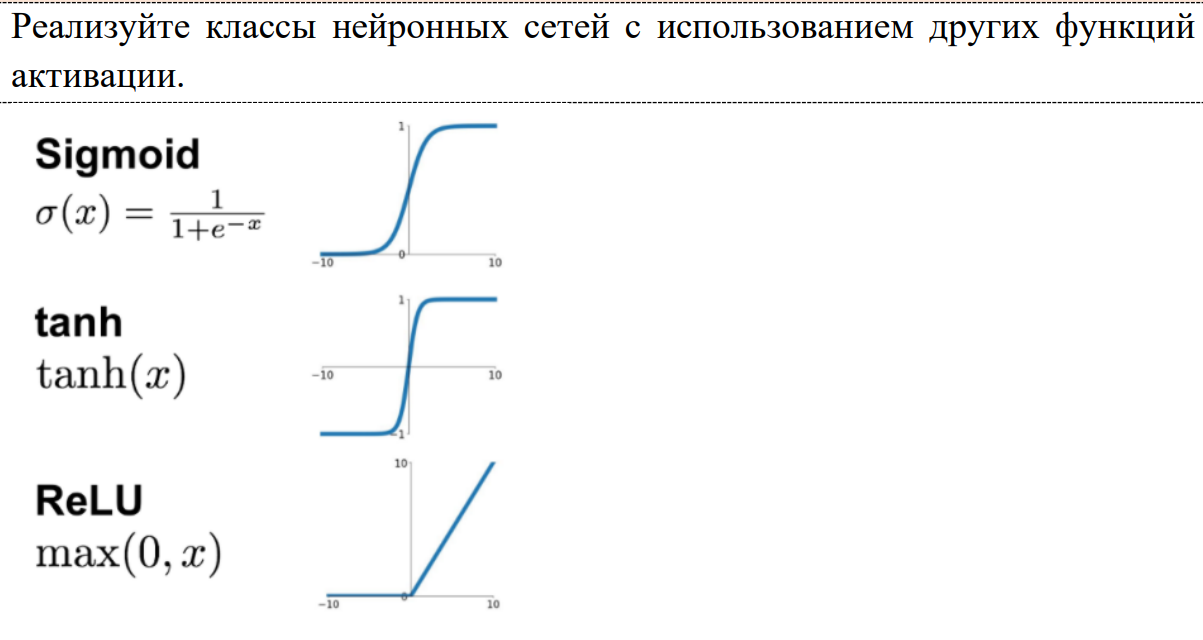

In [ ]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


In [ ]:
import numpy as np
def tanh(x):
    return np.tanh(x)
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9999983369439447


In [ ]:
import numpy as np
def ReLU(x):
    return max(0,x)
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

7


**Задание**


Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f
7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = sns.load_dataset('iris')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,:-1],
    dataset.iloc[:, -1],
    test_size = 0.20
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
110,6.5,3.2,5.1,2.0
90,5.5,2.6,4.4,1.2
109,7.2,3.6,6.1,2.5
24,4.8,3.4,1.9,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y_train.head()

110     virginica
90     versicolor
109     virginica
24         setosa
4          setosa
Name: species, dtype: object

In [ ]:
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


X_ames = data
y_ames = target

print('Ames Housing Dataset Sizes:', X_ames.shape, y_ames.shape)



Ames Housing Dataset Sizes: (506, 13) (506,)
